Hello World Tensorflow Example


In [54]:
import tensorflow as tf

print("Tensorflow version: " + tf.__version__)

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# architecture of model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # first layer, input layer, want to be flat (may not need to flatten if CNN)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # neurons in layer, activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # neurons in layer, activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer, number of classifications

# parameters for the training of the model
# loss -> degree of error, NN trying to minimize loss not maximize accuracy
# metrics we want to track -> accuracy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# ready to train model
model.fit(x_train, y_train, epochs=3)
              
# NN good at fitting, but could overfit, we want model to generalize rather than memorize all samples passed

Tensorflow version: 2.1.0
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2721 - accuracy: 0.9212
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1080 - accuracy: 0.9670
Epoch 3/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0740 - accuracy: 0.9762


In [55]:
# calculate validation loss and validation accuracy
# if there's a huge delta, you probably overfit
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0943 - accuracy: 0.9724
0.09432479011984542
0.9724


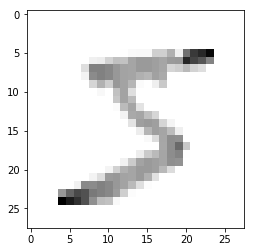

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0]) # values now between 0 and 1, easier for model to train

In [57]:
model.save('num_reader.model')

# load model
new_model = tf.keras.models.load_model('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model/assets


In [58]:
# make prediction
predictions = new_model.predict([x_test])
#print(predictions) # outputs probability distributions


[[5.48813155e-08 9.09693483e-07 7.12573601e-05 ... 9.99680638e-01
  1.09596431e-06 1.62617907e-05]
 [2.52297361e-09 7.69753475e-04 9.99228835e-01 ... 1.48840745e-10
  2.89130853e-08 2.85017305e-11]
 [3.38078259e-08 9.99935389e-01 3.18980210e-06 ... 2.58417476e-05
  1.70999610e-05 2.90860413e-07]
 ...
 [1.04622776e-10 5.13628265e-07 1.10182352e-09 ... 1.48115369e-05
  4.81748145e-07 2.26816810e-05]
 [5.59728619e-08 8.29437212e-08 3.56278007e-09 ... 2.51151221e-07
  6.79292207e-05 1.35277331e-10]
 [2.84597286e-06 5.70897534e-08 3.83622228e-06 ... 9.41142164e-10
  4.15842322e-07 1.83851832e-08]]


In [59]:
import numpy as np
print(np.argmax(predictions[0]))

7


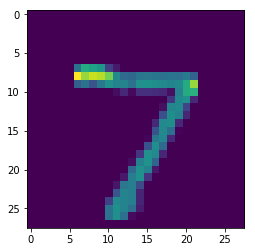

In [60]:
plt.imshow(x_test[0])
plt.show()